In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# Load Dataset
housing = fetch_california_housing()

In [6]:

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [7]:
print("Dataset Preview:")
print(X.head())

Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 16512
Testing samples: 4128


In [10]:
# Build Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predictions
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [13]:
print("\nModel Evaluation Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


Model Evaluation Metrics:
MSE: 0.5558915986952444
RMSE: 0.7455813830127764
MAE: 0.5332001304956553
R² Score: 0.5757877060324508


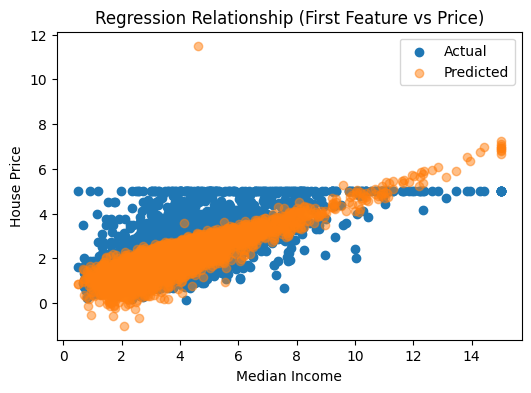

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(X_test.iloc[:,0], y_test, label="Actual")
plt.scatter(X_test.iloc[:,0], y_pred, label="Predicted", alpha=0.5)
plt.title("Regression Relationship (First Feature vs Price)")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.legend()
plt.savefig("regression_line_plot.png")
plt.show()

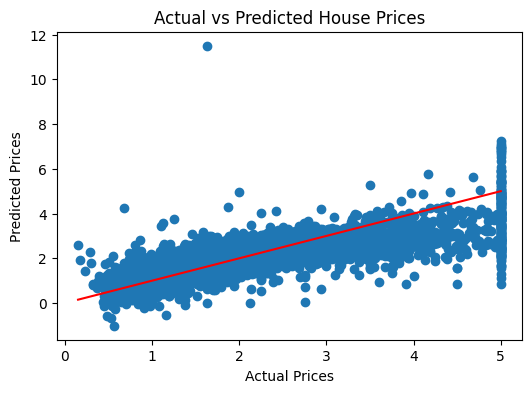

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.savefig("actual_vs_predicted.png")
plt.show()

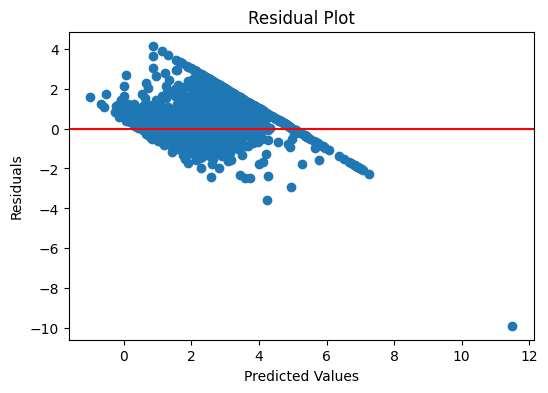

In [17]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.savefig("residual_plot.png")
plt.show()

In [18]:
joblib.dump(model, "house_price_model.pkl")

print("Model saved successfully as house_price_model.pkl")

Model saved successfully as house_price_model.pkl
